<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\DELL\AppData\Local\Temp\ipykernel_10992\206778844.py:10: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+')


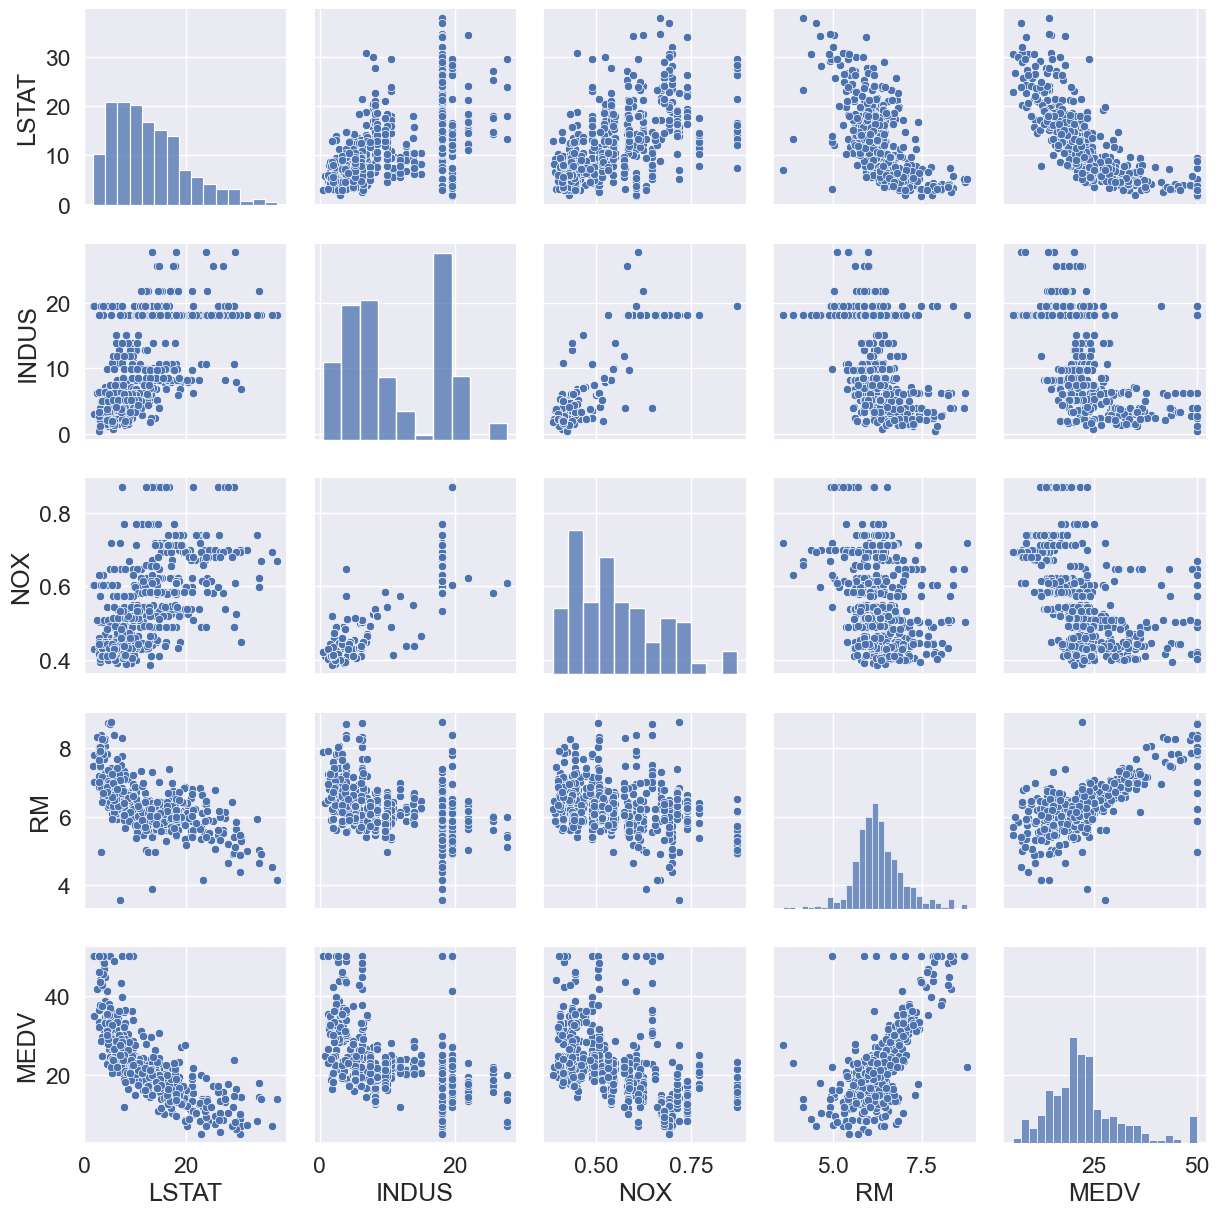

In [3]:
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib as plt
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/rasbt/'
              'python-machine-learning-book-2nd-edition'
              '/master/code/ch10/housing.data.txt',
              sep='\s+')
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
            'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

import matplotlib.pyplot as plt
import seaborn as sns
cols=['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols],height=2.5)
plt.tight_layout()
plt.show()


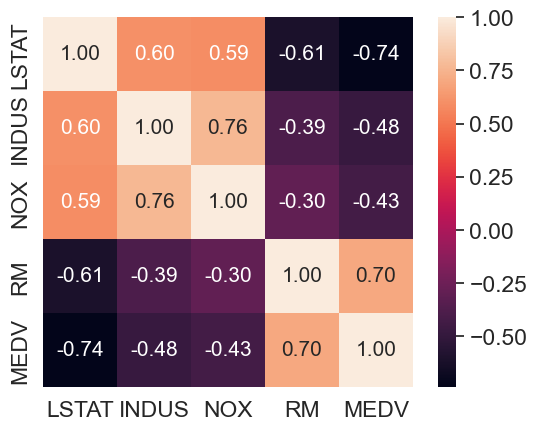

In [4]:
import numpy as np
cm=np.corrcoef(df[cols].values.T)
 # corr() -- you will get labelling of the matrix as 0,1,2,...
 # corrcoef() -- no labelling of matrix
 # .T means matrix inclined towards row-wise
 # you can use (rowvar=False/True)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

In [5]:
X=df[['RM']].values #Simple linear regression
# X- one explanatory variable
Y=df[['MEDV']].values
#Y- one Response variable
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,Y)
print('Slope: %.3f'%lr.coef_[0])
print('Intercept: %.3f'%lr.intercept_)

Slope: 9.103
Intercept: -34.677


C:\Users\DELL\AppData\Local\Temp\ipykernel_10992\3573065436.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Slope: %.3f'%lr.coef_[0])
C:\Users\DELL\AppData\Local\Temp\ipykernel_10992\3573065436.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Intercept: %.3f'%lr.intercept_)


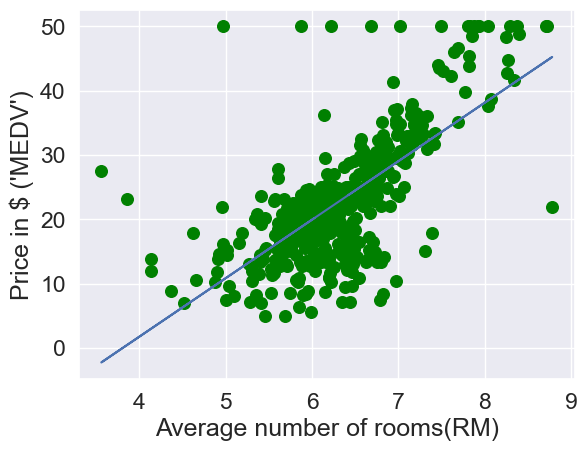

In [6]:
def lin_regplot(X,Y,model):
  plt.scatter(X,Y,c='green',s=70)
  plt.plot(X,model.predict(X))
  return None
lin_regplot(X,Y,lr)
plt.xlabel("Average number of rooms(RM)")
plt.ylabel("Price in $ ('MEDV')")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values #except the last attribute/col/explanatory variable
Y=df['MEDV'].values #only one col/response variable
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
#Test size =20%
lr=LinearRegression() #creating the object of the model
lr.fit(X_train,Y_train) #training of the model based on 80% training
Y_train_pred=lr.predict(X_train) #predicting the trsining data
Y_test_pred=lr.predict(X_test) #prediction of testing data
from sklearn.metrics import mean_squared_error,r2_score
print('MSE train: %.3f, test: %.3f'%(mean_squared_error(Y_train,Y_train_pred),mean_squared_error(Y_test,Y_test_pred)))
print('R^2 train: %.3f, test: %.3f'%(r2_score(Y_train,Y_train_pred),r2_score(Y_test,Y_test_pred)))

MSE train: 19.259, test: 34.057
R^2 train: 0.775, test: 0.573
